In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
display(digits.keys())
display(digits.data.shape) # 8x8の画像が1797枚用意されている
print(digits.DESCR)

# imagesは画像表示する際に、imshowの引数にいれるために使う。imshowはdigits.dataの１次元形式のデータを引数として取れない。

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

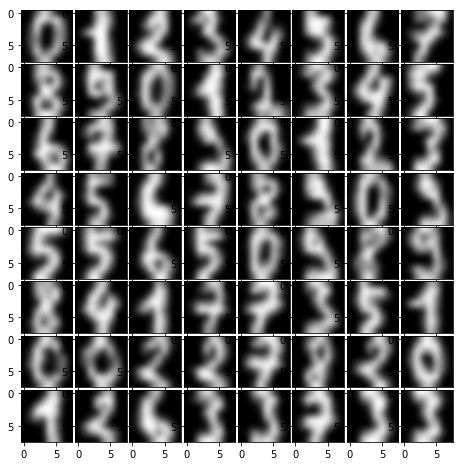

In [28]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    # interporation : https://imagingsolution.blog.fc2.com/blog-entry-142.html 
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='bicubic')
    #  ax.imshow(digits.data[i], cmap=plt.cm.gray, interpolation='bicubic') # Error
    
# for i in range(64):
#     ax = fig.add_subplot(8, 8, i+1)
#     # interporation : https://imagingsolution.blog.fc2.com/blog-entry-142.html 
#     ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='nearest')
    
# plt.gray()
# plt.matshow(digits.images[0])
# plt.show()

In [5]:
X,y = digits.data, digits.target
print("Original data shape: ", X.shape)
pca = PCA(n_components=25) #64次元だったイメージを25次元へ圧縮
X_proj = pca.fit_transform(X)
print("Compressed data shape: ", X_proj.shape)

Original data shape:  (1797, 64)
Compressed data shape:  (1797, 25)


In [6]:
print('寄与率の足し合わせ: ', np.cumsum(pca.explained_variance_ratio_))
print('寄与率の合計: ',np.sum(pca.explained_variance_ratio_))

寄与率の足し合わせ:  [0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063432 0.83530533 0.84940249 0.86258837 0.87506974
 0.88524691 0.89430283 0.90319805 0.91116917 0.91884392 0.92607269
 0.93303089]
寄与率の合計:  0.9330308903209011


In [7]:
print(np.cumsum(pca.explained_variance_ratio_) < 0.50)
print("50%を表す軸の数: ", np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.50)) # 0.5より小さい要素の数をsumで出力 (Trueの要素数)
print("80%を表す軸の数: ", np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.80))
print("90%を表す軸の数: ", np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.90))

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False]
50%を表す軸の数:  4
80%を表す軸の数:  12
90%を表す軸の数:  20


In [31]:
n_components, n_features = pca.components_.shape
#もともと64次元で64特徴量を表していたデータにおいて、特徴量は64だが25次元に次元削減されたデータ
print('(n_components, n_features) = ({},{})'.format(n_components, n_features))

(n_components, n_features) = (25,64)


In [33]:
# 次元圧縮されたデータを元の次元へ戻す。Lossしたデータは戻らない。
X_ = pca.inverse_transform(X_proj)
X_.shape

(1797, 64)

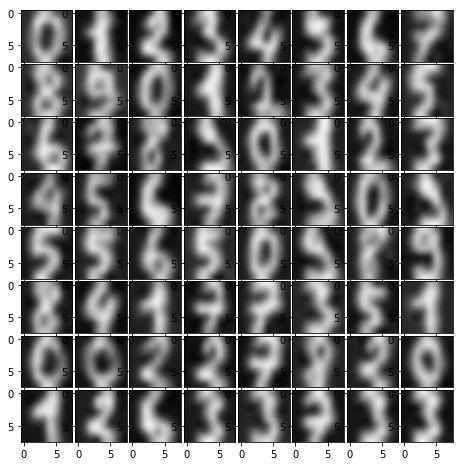

In [39]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax_ = fig.add_subplot(8, 8, i+1)
    ax_.imshow(X_[i].reshape(8,8), cmap=plt.cm.gray, interpolation='bicubic')
#

In [9]:
pca.components_.T.shape

(64, 25)

In [10]:
pca.components_

array([[-4.33368231e-17, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184680e-02, -3.65977110e-02, -1.14684953e-02],
       [ 8.24099856e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697116e-01,  1.94547056e-02, -6.69693867e-03],
       [ 8.92551283e-17,  1.83420721e-02,  1.26475544e-01, ...,
         2.32084161e-01,  1.67026564e-01,  3.48043832e-02],
       ...,
       [ 9.09105941e-17,  2.73571959e-02,  8.53205148e-02, ...,
        -2.04759666e-02, -1.22369406e-01, -5.13941740e-02],
       [ 3.61822099e-17, -4.98960019e-02, -6.90564639e-02, ...,
         1.52757442e-02,  1.01567768e-02,  3.26157510e-02],
       [-1.65894916e-16, -2.05164897e-02, -3.90407300e-02, ...,
         1.22708582e-01,  1.17272062e-01,  8.83274882e-02]])

In [11]:
test = np.array([[1,2,3],[4,5,6],[8,9,10]])
display(test)
display(test[:,:2])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 8,  9, 10]])

array([[1, 2],
       [4, 5],
       [8, 9]])

In [12]:
test.shape

(3, 3)

In [13]:
test.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10])

In [14]:
test2 = np.array([[8,9,10],[4,5,6],[1,2,3]])
test2.reshape(-1)

array([ 8,  9, 10,  4,  5,  6,  1,  2,  3])

In [25]:
display(digits.images.shape)
display(type(digits.images))

(1797, 8, 8)

numpy.ndarray

In [26]:
display(digits.data.shape)
display(type(digits.data))

(1797, 64)

numpy.ndarray